In [2]:
import sys
sys.path.append("../")

In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
import math
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardSkew, fB_HardSkew, showIntervalFunctions

In [9]:
def modelFunctions(N, d = 20):    
    def fA(x):
        return N/2 if x <= d else N/2-x+d

    def fB(x):
        return N/2 if x >= -d else N/2+x+d
    
    return (fA, fB)

def simulate():
    def nextElem(func):
        term = -N/2 if func == max else N/2
        rc = calculateValue(previousA, previousB)
        value = -rc if func == max else rc
        return func(x[current] + value, term)
    
    current = len(x)-1
    for _ in range(0, duration):
        previousA, previousB = fA(x[current - tauA]), fB(x[current - tauB])
        
        prob = calculateProbability(previousA - previousB)
        r = random.random()
        if r < prob:
            nextElement = nextElem(min) # +1
        else:
            nextElement = nextElem(max) # -1
                
        x.append(nextElement)
        current += 1

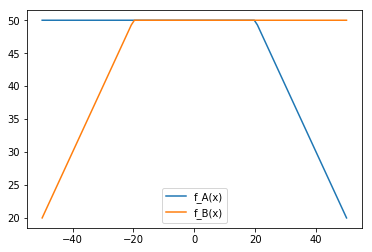

In [10]:
showIntervalFunctions(fA_HardSkew, fB_HardSkew, 100)

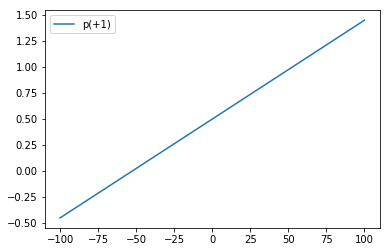

In [3]:
calculateProbability = calc.linear(100)

N = 100
x = np.linspace(-N, N, num=1000)

y = []
for xx in x:
    y.append(calculateProbability(xx))

plt.plot(x, y, label='p(+1)')

plt.legend()
plt.show()

µ =  -0.15009147628418398


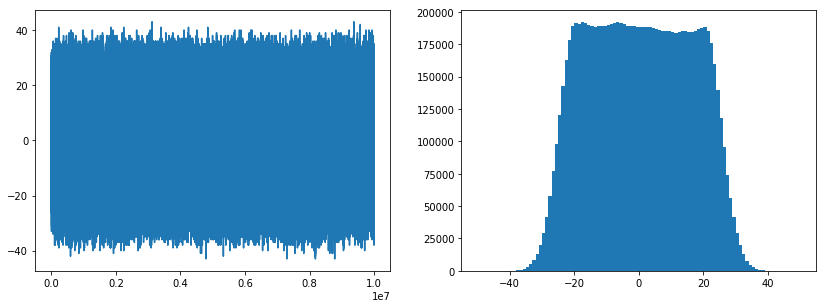

In [12]:
N = 100
tauA = 0
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

µ =  -0.5084388711495201


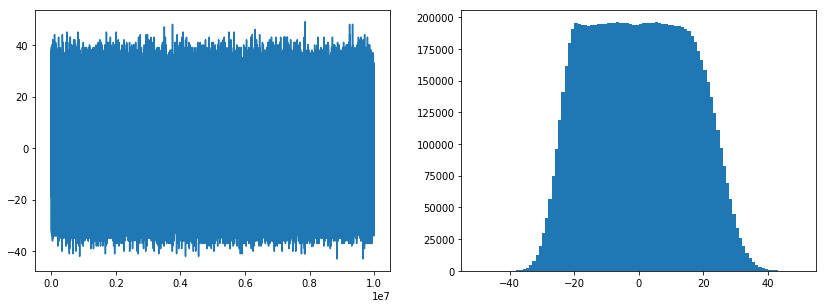

In [13]:
N = 100
tauA = 20
tauB = 0
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));
print('µ = ', np.mean(x[100*conv:]))

µ =  0.452902251156429


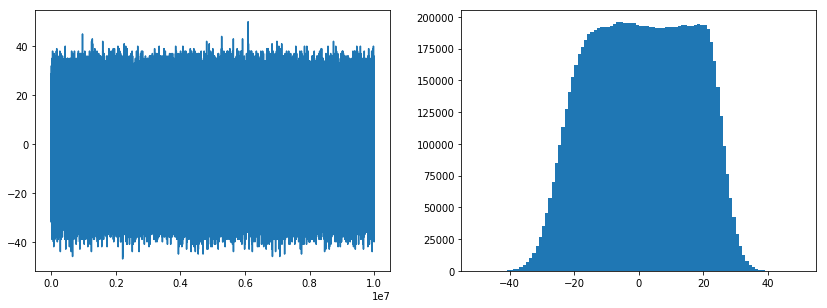

In [14]:
N = 100
tauA = 0
tauB = 20
x = [0] * 20 + [1] 
duration = 100000 * N
conv = N

simulate()
            
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1))
print('µ = ', np.mean(x[100*conv:]))

In [ ]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N
d = 10
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(0, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))


In [ ]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N

tauA = 50
for i in range(0, 70):
    x = x[:101]
    d = i * 2
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

In [ ]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N

tauA = 50
print('d, τ, µ')
for i in (47, 49):
    x = x[:101]
    d = i
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

In [ ]:
N = 100
tauA = 0
tauB = 0
x = [0] * 100 + [1] 
duration = 100000 * N
conv = N
d = 30
(fA, fB) = modelFunctions(N, d = d)

print('d, τ, µ')
for i in range(0, 11):
    x = x[:101]
    tauA = i * 10
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

tauA = 150
for i in range(0, 11):
    x = x[:101]
    d = i * 2
    (fA, fB) = modelFunctions(N, d = d)
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))
    

In [ ]:
calculateProbability(0)

In [ ]:
x = [0] * 100 + [1] 
simulate()
print(d, ', ', tauA, ', ', np.mean(x[100*conv:]))

In [ ]:
print(d, ', ', tauA, ', ', np.mean(x))

In [ ]:
_, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 4.8))
ax1.plot(x)
(bins, _, _) = ax2.hist(x[100*conv:], bins=np.linspace(-N/2, N/2, N+1));

In [ ]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 30
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:151]
    N = i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [0] * 150 + [1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


In [ ]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 30
tauA = 150

print('d, τ, N, µ, r')
for i in range(1, 11):
    x = x[:151]
    N = 100 + i * 50
    (fA, fB) = modelFunctions(N, d = d)
    x = [0] * 150 + [1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)


In [ ]:
N = 100
tauA = 0
tauB = 0
duration = 100000 * N
conv = N
d = 30
tauA = 150

print('d, τ, N, µ, r')
for i in range(0, 35):
    x = x[:151]
    N = 290 + i*2
    (fA, fB) = modelFunctions(N, d = d)
    x = [0] * 150 + [1]
    calculateProbability = calc.linear(N, w = 0.99)
    simulate()
    m = np.mean(x[100*conv:])
    print(d, ', ', tauA, ', ', N, ', ', m, ', ', N/2-m)
